Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
##If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
#!unzip gdrive/MyDrive/CNN\ assignment

In [4]:
#!unzip gdrive/MyDrive/CNN_assignment

#os.listdir()
#os.getcwd()
#os.listdir()
#os.chdir('gdrive/MyDrive/CCN\ assignment')
#os.getcwd()
#os.listdir()



In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2271
128


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=batch_size,
                                                            validation_split = 0.2,
                                                            subset = "training",
                                                            image_size=(img_height,img_width))

Found 6771 files belonging to 9 classes.
Using 5417 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
                                                            shuffle=True,
                                                            seed = 123,
                                                            batch_size=batch_size,
                                                            validation_split = 0.2,
                                                            subset = "validation",
                                                            image_size=(img_height,img_width))

Found 6771 files belonging to 9 classes.
Using 1354 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

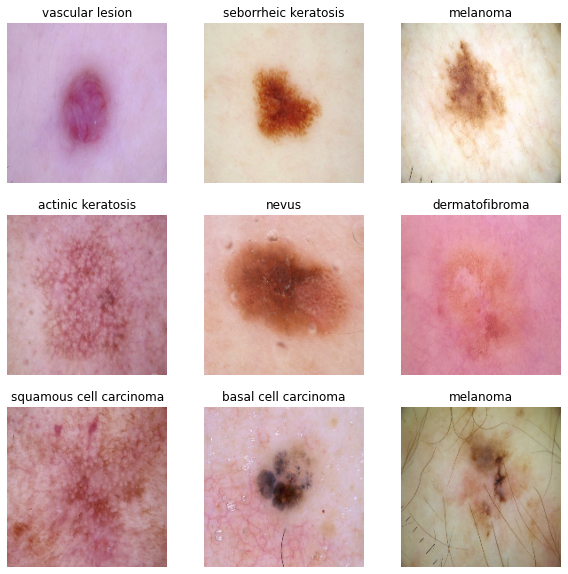

In [11]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):#take creates a Dataset (essentially picks up n number of batches as mentioned in the arguement) with at most count elements from this dataset. In this case it takes the first element from the batch of 32.
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
170/170 [==============================] - 38s 71ms/step - loss: 1.7408 - accuracy: 0.3424 - val_loss: 1.4040 - val_accuracy: 0.4653
Epoch 2/20
170/170 [==============================] - 4s 23ms/step - loss: 1.3729 - accuracy: 0.4822 - val_loss: 1.4797 - val_accuracy: 0.4387
Epoch 3/20
170/170 [==============================] - 4s 23ms/step - loss: 1.1975 - accuracy: 0.5634 - val_loss: 1.1392 - val_accuracy: 0.5997
Epoch 4/20
170/170 [==============================] - 4s 23ms/step - loss: 1.0001 - accuracy: 0.6384 - val_loss: 0.9736 - val_accuracy: 0.6669
Epoch 5/20
170/170 [==============================] - 4s 24ms/step - loss: 0.8171 - accuracy: 0.7092 - val_loss: 1.0457 - val_accuracy: 0.6544
Epoch 6/20
170/170 [==============================] - 4s 26ms/step - loss: 0.6452 - accuracy: 0.7757 - val_loss: 0.8600 - val_accuracy: 0.7216
Epoch 7/20
170/170 [==============================] - 4s 23ms/step - loss: 0.5027 - accuracy: 0.8259 - val_loss: 0.8245 - val_accuracy: 0.726

### Visualizing training results

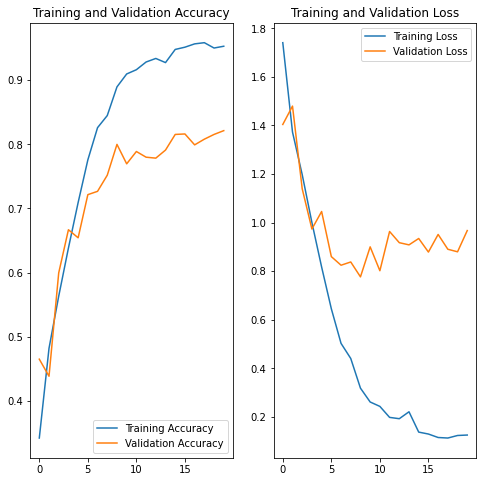

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The model has good fit on training data but not so good fit on test data which indicates that there has been overfitting. 

### Write your findings here

In [18]:
#Trying some random Data Augmentaiton Strategies to reduce overfitting
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

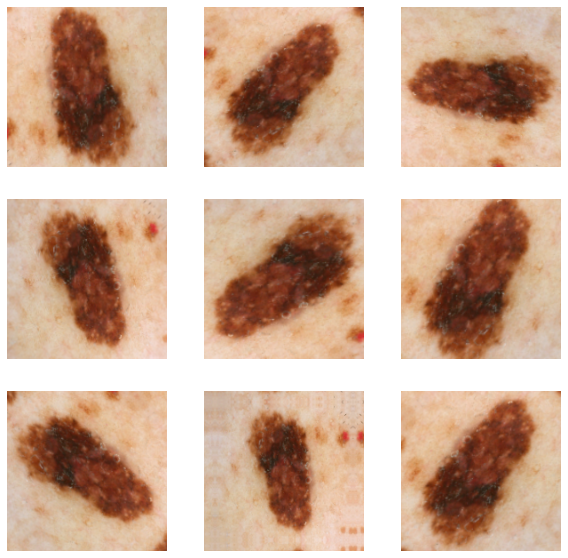

In [19]:
# Visualize how the augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## Adding Dropout layer there was overfitting in the data

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])



### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
170/170 [==============================] - 9s 49ms/step - loss: 1.8509 - accuracy: 0.2928 - val_loss: 1.4988 - val_accuracy: 0.4372
Epoch 2/20
170/170 [==============================] - 11s 65ms/step - loss: 1.4799 - accuracy: 0.4335 - val_loss: 1.3677 - val_accuracy: 0.4778
Epoch 3/20
170/170 [==============================] - 8s 47ms/step - loss: 1.4255 - accuracy: 0.4536 - val_loss: 1.3353 - val_accuracy: 0.4749
Epoch 4/20
170/170 [==============================] - 8s 47ms/step - loss: 1.3609 - accuracy: 0.4698 - val_loss: 1.2502 - val_accuracy: 0.5081
Epoch 5/20
170/170 [==============================] - 8s 47ms/step - loss: 1.3046 - accuracy: 0.4981 - val_loss: 1.2639 - val_accuracy: 0.5126
Epoch 6/20
170/170 [==============================] - 8s 47ms/step - loss: 1.2634 - accuracy: 0.4964 - val_loss: 1.3532 - val_accuracy: 0.4978
Epoch 7/20
170/170 [==============================] - 8s 47ms/step - loss: 1.2397 - accuracy: 0.5202 - val_loss: 1.2857 - val_accuracy: 0.500

### Visualizing the results

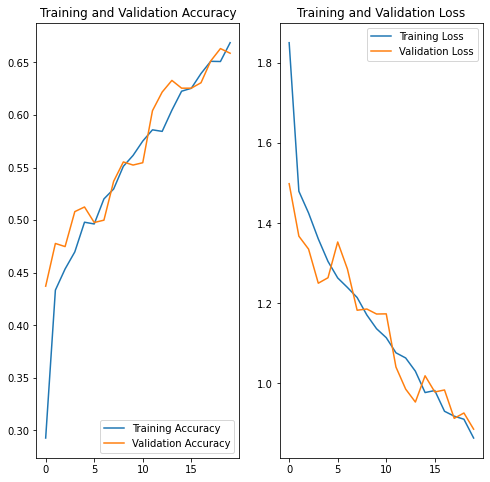

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### The training accuracy did go down but overfitting has reduced drastically hence good improvement as compared to previous model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,vascular lesion,139
1,nevus,357
2,pigmented benign keratosis,472
3,melanoma,440
4,basal cell carcinoma,386
5,squamous cell carcinoma,181
6,dermatofibroma,95
7,seborrheic keratosis,87
8,actinic keratosis,114


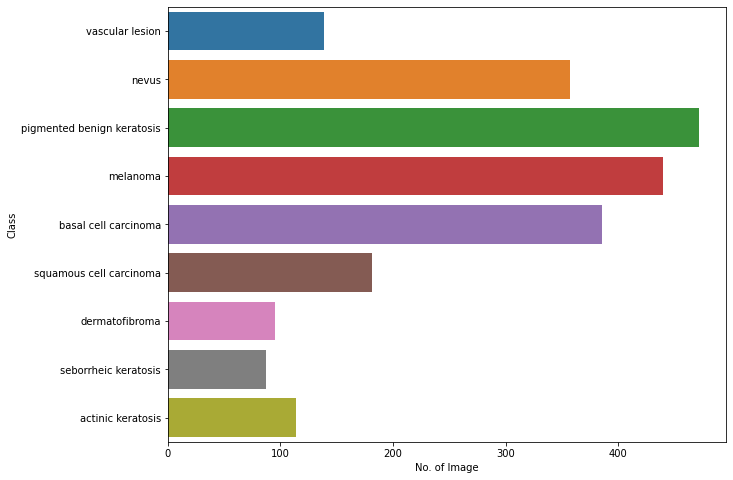

In [25]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**seborrheic keratosis** has the least number of samples

#### - Which classes dominate the data in terms proportionate number of samples?
**Pigmented benign keratosis** dominates the data.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [27]:
os.getcwd()

'/content'

In [28]:
path_to_training_dataset='/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FA79A7120D0>: 100%|██████████| 500/500 [00:20<00:00, 24.08 Samples/s]


Initialised with 386 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA79AF8F070>: 100%|██████████| 500/500 [00:22<00:00, 21.79 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA79E69FFA0>: 100%|██████████| 500/500 [00:25<00:00, 19.89 Samples/s]


Initialised with 440 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA7B606F820>: 100%|██████████| 500/500 [01:30<00:00,  5.49 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1504x1129 at 0x7FA81005B310>: 100%|██████████| 500/500 [01:18<00:00,  6.39 Samples/s]


Initialised with 472 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA87E045C40>: 100%|██████████| 500/500 [00:17<00:00, 28.48 Samples/s]


Initialised with 87 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FA87E04FA00>: 100%|██████████| 500/500 [00:42<00:00, 11.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA79E203370>: 100%|██████████| 500/500 [00:17<00:00, 29.10 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FA79AF8FA30>: 100%|██████████| 500/500 [00:17<00:00, 28.64 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
from glob import glob
path_list_n = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_n

['/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/vascular lesion/output/vascular lesion_original_ISIC_0031648.jpg_69b56b01-2e4b-42f4-a831-068b25544f8e.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/vascular lesion/output/vascular lesion_original_ISIC_0029448.jpg_11a0823c-d07e-40d4-b663-d3fee99d1082.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/vascular lesion/output/vascular lesion_original_ISIC_0029486.jpg_fb6cd37b-ccc0-4f0b-a205-53410557b54e.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/vascular lesion/output/vascular lesion_original_ISIC_0030070.jpg_9a40f31d-070b-4674-9526-6968260038fc.jpg',
 '/content/gdrive/MyDrive/Melanoma Detection Assignment/Skin Cancer ISIC Un - Augmented/Train/vascular lesion/output/vascular lesion_original_ISIC_0032745.jpg_df769500-08e0-4f23-9db3-22b7bf46e

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [32]:
dataframe_dict_new = dict(zip(path_list_n, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df.append(df2)

In [34]:
new_df['Label'].value_counts()

vascular lesion               1000
nevus                         1000
pigmented benign keratosis    1000
melanoma                      1000
basal cell carcinoma          1000
squamous cell carcinoma       1000
dermatofibroma                1000
seborrheic keratosis          1000
actinic keratosis             1000
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [36]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training' ,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11271 files belonging to 9 classes.
Using 9017 files for training.


#### **Todo:** Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation' ,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11271 files belonging to 9 classes.
Using 2254 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [38]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [40]:
##In evaluation metric 20 epochs are mentioned
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
282/282 [==============================] - 48s 163ms/step - loss: 1.4083 - accuracy: 0.4774 - val_loss: 1.6488 - val_accuracy: 0.5275
Epoch 2/20
282/282 [==============================] - 45s 157ms/step - loss: 0.9258 - accuracy: 0.6594 - val_loss: 1.0388 - val_accuracy: 0.6127
Epoch 3/20
282/282 [==============================] - 47s 165ms/step - loss: 0.6030 - accuracy: 0.7833 - val_loss: 0.6833 - val_accuracy: 0.7910
Epoch 4/20
282/282 [==============================] - 46s 156ms/step - loss: 0.4189 - accuracy: 0.8458 - val_loss: 1.4231 - val_accuracy: 0.6451
Epoch 5/20
282/282 [==============================] - 44s 155ms/step - loss: 0.3328 - accuracy: 0.8852 - val_loss: 0.7126 - val_accuracy: 0.7786
Epoch 6/20
282/282 [==============================] - 44s 153ms/step - loss: 0.2631 - accuracy: 0.9083 - val_loss: 0.6108 - val_accuracy: 0.8234
Epoch 7/20
282/282 [==============================] - 44s 155ms/step - loss: 0.2201 - accuracy: 0.9199 - val_loss: 0.9921 - val_ac

#### **Todo:**  Visualize the model results

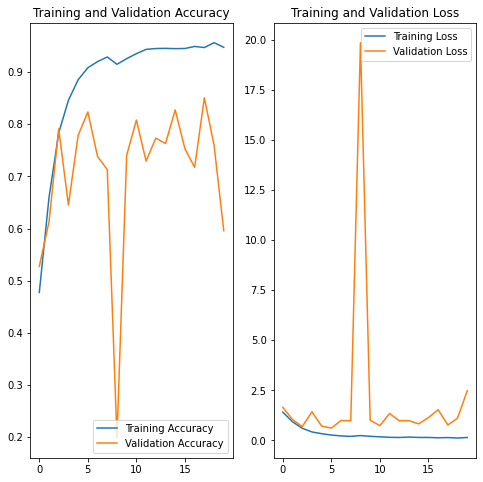

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Now the difference in accuracy between training and validation is lower hence overfitting issue is addressed .Yes the class imbalance did help